# Pre

## Imports

In [12]:
import itertools
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)
import statsmodels.formula.api as smf

In [2]:
from Functions import get_ages_cols, get_category_dict

## Directories etc.

In [3]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

## Get data

In [4]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)

In [5]:
ages_cols = get_ages_cols()
category_dict = get_category_dict()

# Results

## Plots

In [6]:
param_cols = {k: category_dict[k] for k in ('Beta', 'Alpha', 'Nalpha', 'Forget')}
# param_cols = {
#     'beta': [c for c in all_data_z.columns if 'beta' in c],
#     'alpha': [c for c in all_data_z.columns if ('alpha' in c) and ('nalpha' not in c)],
#     'nalpha': [c for c in all_data_z.columns if 'nalpha' in c],
# }

new_col_names = []
for param_name, cols in param_cols.items():
    for p0, p1 in itertools.combinations(cols, 2):
        new_col_name = '{}_{}_minus_{}'.format(param_name, p0[:2], p1[:2])
        new_col_names += [new_col_name]
        all_data_z[new_col_name] = all_data_z[p0] - all_data_z[p1]
    
all_data_z

,ID,PreciseYrs,BMI,meanT,PDS,sex,age_group_,PDS_group_,T_group_,bf_ACC,...,bf_prew,bf_delay,Beta_rl_minus_bf,Beta_rl_minus_ps,Beta_bf_minus_ps,Alpha_rl_minus_bf,Alpha_rl_minus_ps,Alpha_bf_minus_ps,Nalpha_rl_minus_ps,Forget_bf_minus_rl
0,17,8.657084,18.200751,NaN,2.50,Female,08-10,2_mid,NaN,-1.449943,...,-2.017761,0.723703,-0.183323,-1.317409,-1.134086,0.785534,-0.171564,-0.957098,-0.996536,2.217899
1,18,12.637919,16.157863,NaN,2.25,Female,10-13,1_early,NaN,0.185568,...,0.749533,0.573609,0.272851,0.452062,0.179210,0.191748,0.692903,0.501155,1.212912,-0.910841
2,20,14.543463,17.433768,120.649667,2.80,Male,13-15,3_late,3_100%,0.536040,...,0.993548,-0.046277,-0.222624,0.698263,0.920887,-0.279760,-1.111773,-0.832013,0.685264,-0.100391
3,22,16.490075,22.709959,147.334443,3.00,Male,15-17,3_late,3_100%,-0.281751,...,-0.469027,0.014931,-0.237450,-0.863710,-0.626260,0.068281,-0.840277,-0.908558,0.672269,0.629280
4,23,11.206023,15.147686,27.712900,1.00,Male,10-13,0_pre,1_50%,0.302416,...,-0.172768,-0.326015,-2.764148,-1.279011,1.485137,-0.504440,-1.050442,-0.546002,-1.037788,0.013336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,465,22.333333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,-0.223292,...,-0.257159,0.380071,-0.566342,1.132146,1.698488,1.033224,0.059913,-0.973311,0.415008,-0.203919
243,466,20.083333,NaN,NaN,NaN,Male,2Stud.,4_Stud.,4_Stud.,-1.157930,...,-1.044524,-0.933035,-0.245053,1.043125,1.288178,1.741550,2.074558,0.333009,1.497243,-0.402820
244,467,18.750000,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,0.185568,...,-1.116037,0.600023,-0.400726,0.691149,1.091875,-0.369032,-0.450033,-0.081001,-0.903586,0.727540
245,468,21.833333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,-0.398528,...,-1.115958,0.699948,1.322032,1.871947,0.549916,3.313299,3.230112,-0.083187,-2.296159,1.782126


In [7]:
diff_dat_cols = ages_cols + new_col_names
diff_dat_cols
diff_dat = all_data_z[diff_dat_cols]
diff_dat_long = diff_dat.melt(id_vars=ages_cols, var_name='param_pair', value_name='difference')
diff_dat_long['param'] = diff_dat_long['param_pair'].apply(lambda x : x.split('_')[0])
diff_dat_long['pair'] = diff_dat_long['param_pair'].apply(lambda x : '_'.join(x.split('_')[1:]))
diff_dat_long

,ID,PreciseYrs,BMI,meanT,PDS,sex,age_group_,PDS_group_,T_group_,param_pair,difference,param,pair
0,17,8.657084,18.200751,NaN,2.50,Female,08-10,2_mid,NaN,Beta_rl_minus_bf,-0.183323,Beta,rl_minus_bf
1,18,12.637919,16.157863,NaN,2.25,Female,10-13,1_early,NaN,Beta_rl_minus_bf,0.272851,Beta,rl_minus_bf
2,20,14.543463,17.433768,120.649667,2.80,Male,13-15,3_late,3_100%,Beta_rl_minus_bf,-0.222624,Beta,rl_minus_bf
3,22,16.490075,22.709959,147.334443,3.00,Male,15-17,3_late,3_100%,Beta_rl_minus_bf,-0.237450,Beta,rl_minus_bf
4,23,11.206023,15.147686,27.712900,1.00,Male,10-13,0_pre,1_50%,Beta_rl_minus_bf,-2.764148,Beta,rl_minus_bf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,465,22.333333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,Forget_bf_minus_rl,-0.203919,Forget,bf_minus_rl
1972,466,20.083333,NaN,NaN,NaN,Male,2Stud.,4_Stud.,4_Stud.,Forget_bf_minus_rl,-0.402820,Forget,bf_minus_rl
1973,467,18.750000,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,Forget_bf_minus_rl,0.727540,Forget,bf_minus_rl
1974,468,21.833333,NaN,NaN,NaN,Female,2Stud.,4_Stud.,4_Stud.,Forget_bf_minus_rl,1.782126,Forget,bf_minus_rl


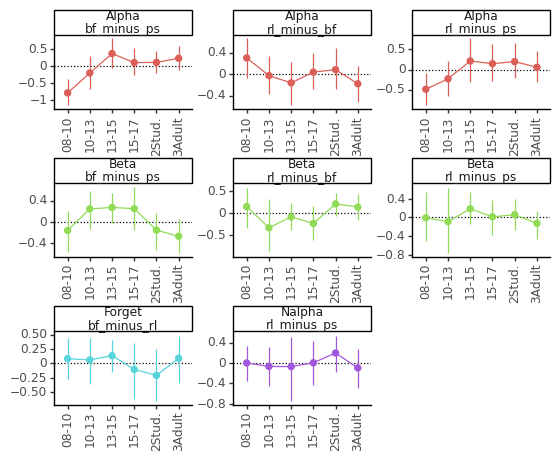

<ggplot: (115293055796)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\11_ParameterDifferences.png


In [8]:
g = (gg.ggplot(diff_dat_long, gg.aes('age_group_', 'difference', color='param', group=1))
     + gg.geom_hline(yintercept=0, linetype='dotted')
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.theme(subplots_adjust={'hspace': 1, 'wspace': 0.3})
     + gg.theme(legend_position='none')
     + gg.labs(x='', y='')
     + gg.facet_wrap('~ param + pair', scales='free')
    )
print(g)
g.save(os.path.join(plot_save_path, '11_ParameterDifferences.png'))

## Regression models

In [62]:
diff_stats = pd.DataFrame()

for out in [c for c in diff_dat.columns if 'minus' in c]:
    
    mod = smf.ols(formula='{} ~ PreciseYrs + np.square(PreciseYrs)'.format(out), data=diff_dat)
    res = mod.fit()
#     print(res.summary())
    
    coef_se = pd.DataFrame(res.bse).reset_index().rename(columns={'index': 'predictor', 0: 'coef_se'})
    coef = pd.DataFrame(res.params).reset_index().rename(columns={'index': 'predictor', 0: 'coef'})
    p = pd.DataFrame(res.pvalues).reset_index().rename(columns={'index': 'predictor', 0: 'p'})
    
    row = coef.merge(coef_se).merge(p)
    row['outcome'] = out
    
    diff_stats = diff_stats.append(row)
    
diff_stats

,predictor,coef,coef_se,p,outcome
0,Intercept,0.013441,0.819187,0.986923,Beta_rl_minus_bf
1,PreciseYrs,-0.020239,0.092783,0.827511,Beta_rl_minus_bf
2,np.square(PreciseYrs),0.000993,0.002424,0.682556,Beta_rl_minus_bf
0,Intercept,-0.025557,0.897929,0.977317,Beta_rl_minus_ps
1,PreciseYrs,0.004827,0.101701,0.962187,Beta_rl_minus_ps
2,np.square(PreciseYrs),-0.000172,0.002657,0.948420,Beta_rl_minus_ps
0,Intercept,-0.038998,0.771675,0.959736,Beta_bf_minus_ps
1,PreciseYrs,0.025065,0.087402,0.774523,Beta_bf_minus_ps
2,np.square(PreciseYrs),-0.001165,0.002283,0.610490,Beta_bf_minus_ps
0,Intercept,1.078899,0.798029,0.177642,Alpha_rl_minus_bf


In [63]:
diff_stats['out_param'] = diff_stats['outcome'].apply(lambda x : x.split('_')[0])
diff_stats['task1'] = diff_stats['outcome'].apply(lambda x : x.split('_')[1])
diff_stats['task2'] = diff_stats['outcome'].apply(lambda x : x.split('_')[3])
diff_stats['tasks'] = diff_stats['outcome'].apply(lambda x : '_'.join([x.split('_')[1], x.split('_')[3]]))
diff_stats

,predictor,coef,coef_se,p,outcome,out_param,task1,task2,tasks
0,Intercept,0.013441,0.819187,0.986923,Beta_rl_minus_bf,Beta,rl,bf,rl_bf
1,PreciseYrs,-0.020239,0.092783,0.827511,Beta_rl_minus_bf,Beta,rl,bf,rl_bf
2,np.square(PreciseYrs),0.000993,0.002424,0.682556,Beta_rl_minus_bf,Beta,rl,bf,rl_bf
0,Intercept,-0.025557,0.897929,0.977317,Beta_rl_minus_ps,Beta,rl,ps,rl_ps
1,PreciseYrs,0.004827,0.101701,0.962187,Beta_rl_minus_ps,Beta,rl,ps,rl_ps
2,np.square(PreciseYrs),-0.000172,0.002657,0.948420,Beta_rl_minus_ps,Beta,rl,ps,rl_ps
0,Intercept,-0.038998,0.771675,0.959736,Beta_bf_minus_ps,Beta,bf,ps,bf_ps
1,PreciseYrs,0.025065,0.087402,0.774523,Beta_bf_minus_ps,Beta,bf,ps,bf_ps
2,np.square(PreciseYrs),-0.001165,0.002283,0.610490,Beta_bf_minus_ps,Beta,bf,ps,bf_ps
0,Intercept,1.078899,0.798029,0.177642,Alpha_rl_minus_bf,Alpha,rl,bf,rl_bf


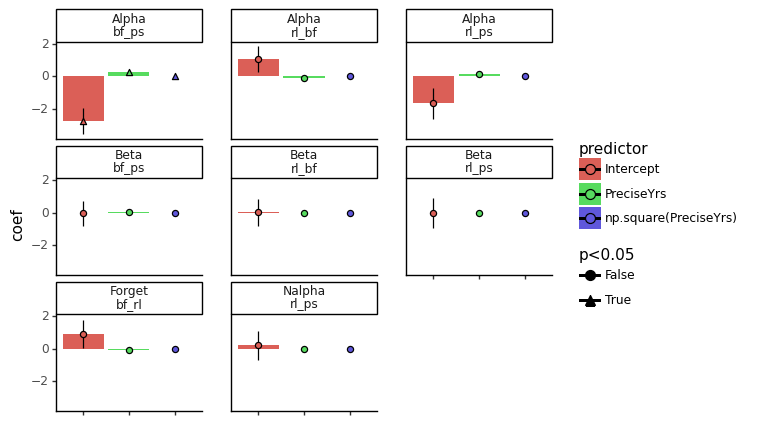

<ggplot: (115294937341)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\11_DifferenceRegressionModels.png


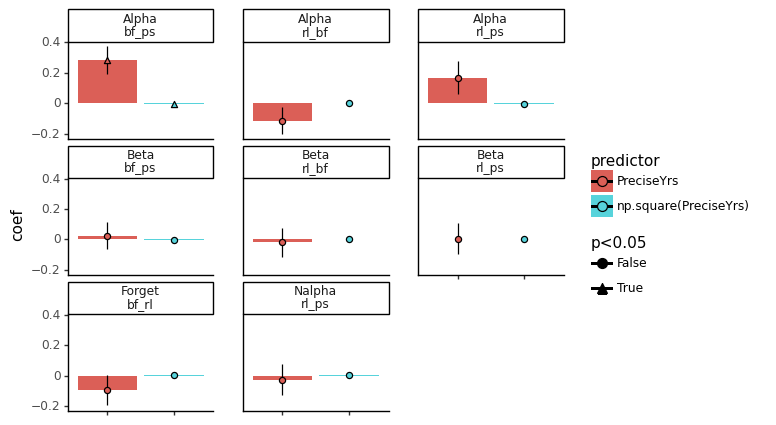

<ggplot: (115294937341)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\11_DifferenceRegressionModels2.png


In [72]:
g = (gg.ggplot(diff_stats, gg.aes('predictor', 'coef', fill='predictor', shape='p<0.05'))
     + gg.geom_bar(stat='identity')
     + gg.geom_pointrange(gg.aes(ymin='coef-coef_se', ymax='coef+coef_se'))
     + gg.theme(axis_text_x=gg.element_text(rotation=90, hjust=0.5))
     + gg.theme(subplots_adjust={'wspace': 0.2})
     + gg.theme(axis_title_x=gg.element_blank(), axis_text_x=gg.element_blank())
#      + gg.scale_fill_manual(['red', 'green', 'blue'])
     + gg.facet_wrap('~ out_param + tasks')
    )
print(g)
g.save(os.path.join(plot_save_path, '11_DifferenceRegressionModels.png'))

g.data = diff_stats.loc[diff_stats['predictor'] != 'Intercept']
print(g)
g.save(os.path.join(plot_save_path, '11_DifferenceRegressionModels2.png'))